## Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import time
import shutil
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.utils import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
import tensorflow as tf
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
print("Tensorflow version " + tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, accuracy_score

from mlxtend.plotting import plot_confusion_matrix

Tensorflow version 2.8.2


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
from keras.models import load_model

## Prepare Data and Model

In [ ]:
ResNet50_model = load_model("/content/drive/MyDrive/FinalProject_AdvancedCV/Model/ResNet50/ResNet50.h5")
VGG16_model = load_model("/content/drive/MyDrive/FinalProject_AdvancedCV/Model/VGG16/VGG16.h5")

In [ ]:
test_path = "/content/drive/MyDrive/FinalProject_AdvancedCV/Image Test"
test_df = pd.read_csv("/content/drive/MyDrive/FinalProject_AdvancedCV/test_images.csv")

In [ ]:
test_df

,images,labels
0,0_0.jpg,0
1,0_1.jpg,0
2,0_10.jpg,0
3,0_11.jpg,0
4,0_12.jpg,0
...,...,...
833,6_54.jpg,6
834,6_6.jpg,6
835,6_7.jpg,6
836,6_8.jpg,6


In [ ]:
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
emotion_counts = test_df['labels'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
emotion_counts

,emotion,number
0,Angry,70
1,Digust,10
2,Fear,104
3,Happy,235
4,Sad,107
5,Surprise,108
6,Neutral,204


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


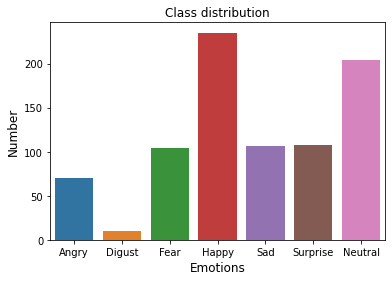

In [ ]:
CATEGORIES = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
import seaborn as sns
plt.figure(figsize=(6,4))
sns.barplot(emotion_counts.emotion, emotion_counts.number)
plt.title('Class distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()

In [ ]:
labels = test_df['labels']

In [ ]:
test_df['images']

0       0_0.jpg
1       0_1.jpg
2      0_10.jpg
3      0_11.jpg
4      0_12.jpg
         ...   
833    6_54.jpg
834     6_6.jpg
835     6_7.jpg
836     6_8.jpg
837     6_9.jpg
Name: images, Length: 838, dtype: object

In [ ]:
test_images = []
for filename in test_df['images']:
    img = cv2.imread(os.path.join(test_path,filename))
    img = cv2.resize(img, (48, 48))
    if img is not None:
        test_images.append(img)

In [ ]:
gray_test_images = []
for image in test_images:
    image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    image = np.expand_dims(image, 0)
    image = np.repeat(image[..., np.newaxis], 3, -1)
    image = image/255.
    gray_test_images.append(image)

## Predict

In [ ]:
predicted_labels_ResNet50 = []

for image in gray_test_images:
    pred = ResNet50_model.predict(image)
    predicted_labels_ResNet50.append(np.argmax(pred))

In [ ]:
predicted_labels_VGG16 = []

for image in gray_test_images:
    pred = VGG16_model.predict(image)
    predicted_labels_VGG16.append(np.argmax(pred))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy_ResNet50 = accuracy_score(labels, predicted_labels_ResNet50)
cf_matrix_ResNet50 = confusion_matrix(labels, predicted_labels_ResNet50)
accuracy_VGG16 = accuracy_score(labels, predicted_labels_VGG16)
cf_matrix_VGG16 = confusion_matrix(labels, predicted_labels_VGG16)

#### Accuracy, Confusion Matrix, Normalized Confusion Matrix of ResNet50

Accuracy =  0.22673031026252982


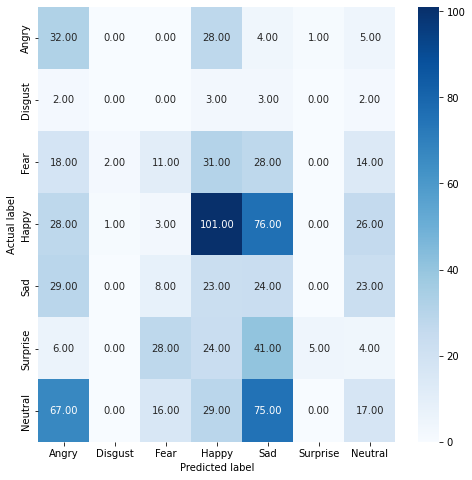

In [ ]:
print("Accuracy = ",accuracy_ResNet50)
import seaborn as sn
fig, ax = plt.subplots(figsize=(8,8))
sn.heatmap((cf_matrix_ResNet50), annot=True, fmt='.2f', cmap=plt.cm.Blues, xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Accuracy =  0.22673031026252982


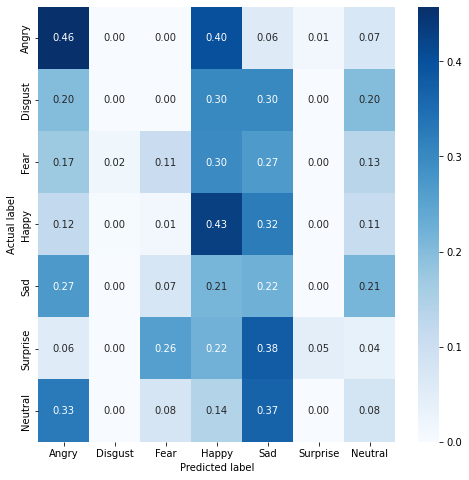

In [ ]:
print("Accuracy = ",accuracy_ResNet50)
import seaborn as sn
cmn = cf_matrix_ResNet50.astype('float') / cf_matrix_ResNet50.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(8,8))
sn.heatmap((cmn), annot=True, fmt='.2f', cmap=plt.cm.Blues, xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### Accuracy, Confusion Matrix, Normalized Confusion Matrix of VGG16

Accuracy =  0.3723150357995227


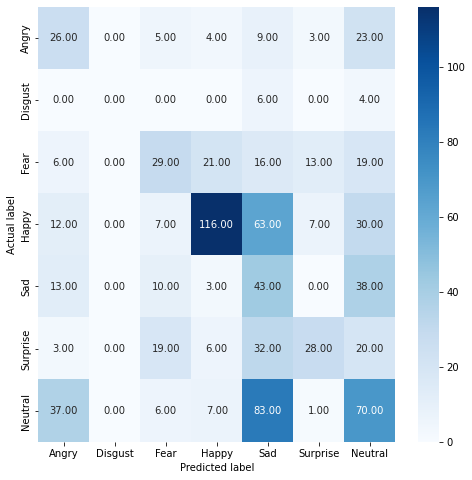

In [ ]:
print("Accuracy = ",accuracy_VGG16)
import seaborn as sn
fig, ax = plt.subplots(figsize=(8,8))
sn.heatmap((cf_matrix_VGG16), annot=True, fmt='.2f', cmap=plt.cm.Blues, xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Accuracy =  0.3723150357995227


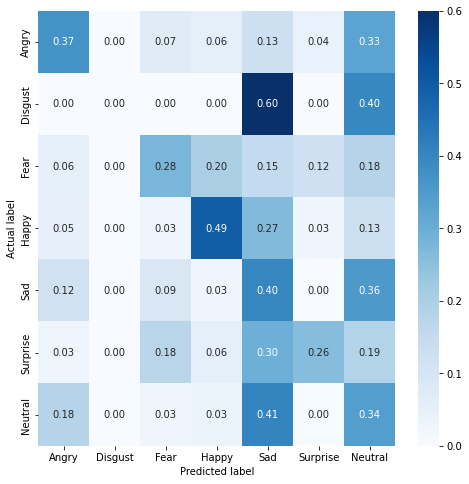

In [ ]:
print("Accuracy = ",accuracy_VGG16)
import seaborn as sn
cmn_2 = cf_matrix_VGG16.astype('float') / cf_matrix_VGG16.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(8,8))
sn.heatmap((cmn_2), annot=True, fmt='.2f', cmap=plt.cm.Blues, xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()